In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import lmfit
from lmfit.models import LorentzianModel

In [2]:
#Set Fonts/Plot Style

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 22})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [3]:
#averaging five sets into one
def all5avg(time1,time2, time3, time4, time5):
    dat=[time1, time2, time3, time4, time5]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t',skip_header=12))
    df=np.array(df)
    dfavg=(df[0,:,:]+df[1,:,:]+df[2,:,:]+df[3,:,:]+df[4,:,:])/5
    name=time1[:10]
    return (np.savetxt(name +'.dat', dfavg, delimiter='\t'))

In [5]:
#all temperature with subtracting water
def alltemp_s( data10, data25, data40, data50, data25ah, data20ah, 
            data_w10, data_w25, data_w40, data_w50, data_w25ah, data_w20ah):
    dat=[data10, data25, data40, data50, data25ah, data20ah]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    
    df_w=[]
    dat_w=[data_w10, data_w25, data_w40, data_w50, data_w25ah, data_w20ah]
    for i in range(len(dat_w)):
        df_w.append(np.genfromtxt(dat_w[i], delimiter='\t'))
    df_w=np.array(df_w)
    
    I=[]
    for i in range(len(dat_w)):
        I.append(df[i,:,1]-df_w[i,:,1])   # substracting each temp empty capillary
    I=np.array(I)
    
    color=['red','blue','green','white','cyan','purple']
    lev=['25K','10K','40K','50K','25K_ah','20K_ah']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend(prop={'size':20})
    ax.set_xlim([0.03, 0.42])
    ax.set_ylim([0.04, 3])
    ax.set_yscale('log')
    ax.set_title("with substracting water")
    name=data10[1:4]
    #return plt.savefig('Fin'+str(name))
    plt.show()

In [6]:
#all temperature without subtracting water
def alltemp( data10, data25, data40, data50, data25ah, data20ah, datawater):
    dat=[data10, data25, data40, data50, data25ah, data20ah, datawater]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    color=['red','blue','green','white','cyan','purple', 'yellow']
    lev=['25K','10K','40K','50K','25K_ah','20K_ah', "water 25 K"]
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend(prop={'size':20})
    ax.set_xlim([0.03, 0.42])
    ax.set_ylim([0.08, 0.8])
    ax.set_yscale('log')
    #ax.set_title("without substracting water")
    name=data10[1:4]
    return plt.savefig('Fin'+str(name))
    plt.show()

In [ ]:
#CH in temp (10,25, 40,50,25,20)

#Ch1: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol
#Ch2: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0013 mg AuNPs
#Ch3: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0066 mg AuNPs
#Ch4: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0132 mg AuNPs
#Ch5: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0264 mg AuNPs

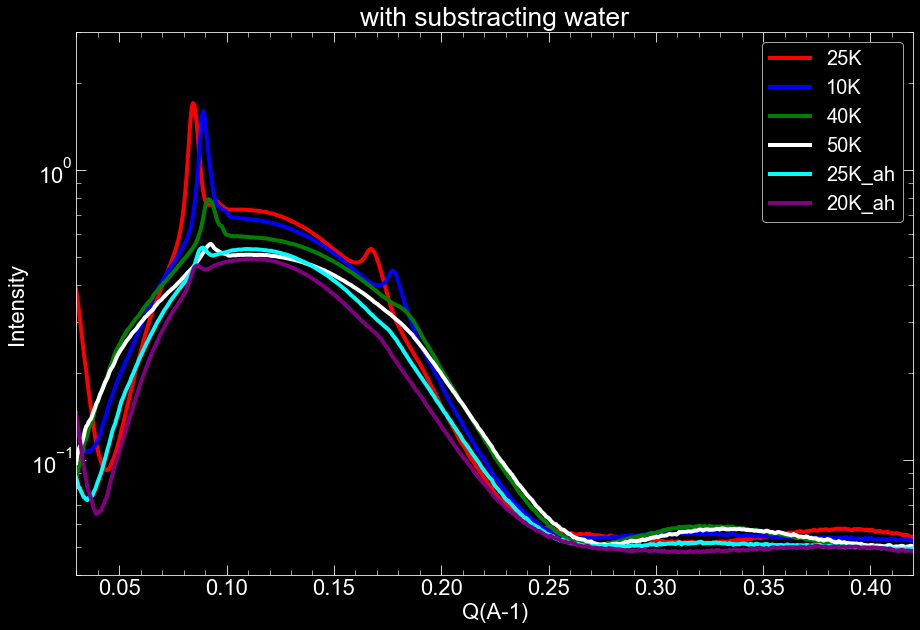

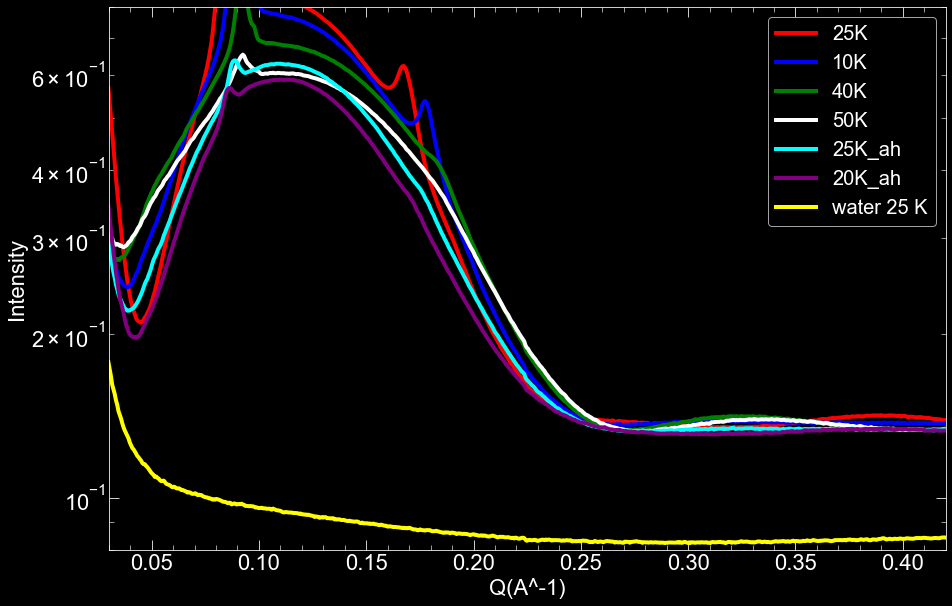

In [7]:
# for ch1 ( 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol) 
alltemp_s('SCh1_00144.dat', 'SCh1_00157.dat',
        'SCh1_00170.dat','SCh1_00183.dat',
        'SCh1_00196.dat','SCh1_00209.dat',
         'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SCh1_00144.dat', 'SCh1_00157.dat',
        'SCh1_00170.dat','SCh1_00183.dat',
        'SCh1_00196.dat','SCh1_00209.dat',
         'SH2O_00152.dat')

In [ ]:
# for ch2 ( 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0013 mg AuNPs 
alltemp_s('SCh2_00145.dat', 'SCh2_00158.dat',
        'SCh2_00171.dat','SCh2_00184.dat',
        'SCh2_00197.dat','SCh2_00210.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SCh2_00145.dat', 'SCh2_00158.dat',
        'SCh2_00171.dat','SCh2_00184.dat',
        'SCh2_00197.dat','SCh2_00210.dat',
          'SH2O_00152.dat')

In [ ]:
# for ch3 ( 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0066 mg AuNPs)
alltemp_s('SCh3_00146.dat', 'SCh3_00159.dat',
        'SCh3_00172.dat','SCh3_00185.dat',
        'SCh3_00198.dat','SCh3_00211.dat',
        'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SCh3_00146.dat', 'SCh3_00159.dat',
        'SCh3_00172.dat','SCh3_00185.dat',
        'SCh3_00198.dat','SCh3_00211.dat',
        'SH2O_00152.dat')

In [ ]:
# for ch4 ( 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0132 mg AuNPs)
alltemp_s('SCh4_00147.dat', 'SCh4_00160.dat',
        'SCh4_00173.dat','SCh4_00186.dat',
        'SCh4_00199.dat','SCh4_00212.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SCh4_00147.dat', 'SCh4_00160.dat',
        'SCh4_00173.dat','SCh4_00186.dat',
        'SCh4_00199.dat','SCh4_00212.dat',
          'SH2O_00152.dat')

In [ ]:
# for ch5 ( 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0264 mg AuNPs)
alltemp_s('SCh5_00148.dat', 'SCh5_00161.dat',
        'SCh5_00174.dat','SCh5_00187.dat',
        'SCh5_00200.dat','SCh5_00213.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SCh5_00148.dat', 'SCh5_00161.dat',
        'SCh5_00174.dat','SCh5_00187.dat',
        'SCh5_00200.dat','SCh5_00213.dat',
          'SH2O_00152.dat')

In [7]:
#DP in temp (10,25, 40,50,25,20)
#DP1: 40 µl miliQ water + 2 mg DPPC
#DP2: 40 µl miliQ water + 2 mg DPPC + 0.0013 mg AuNPs
#DP3: 40 µl miliQ water + 2 mg DPPC + 0.013 mg AuNPs

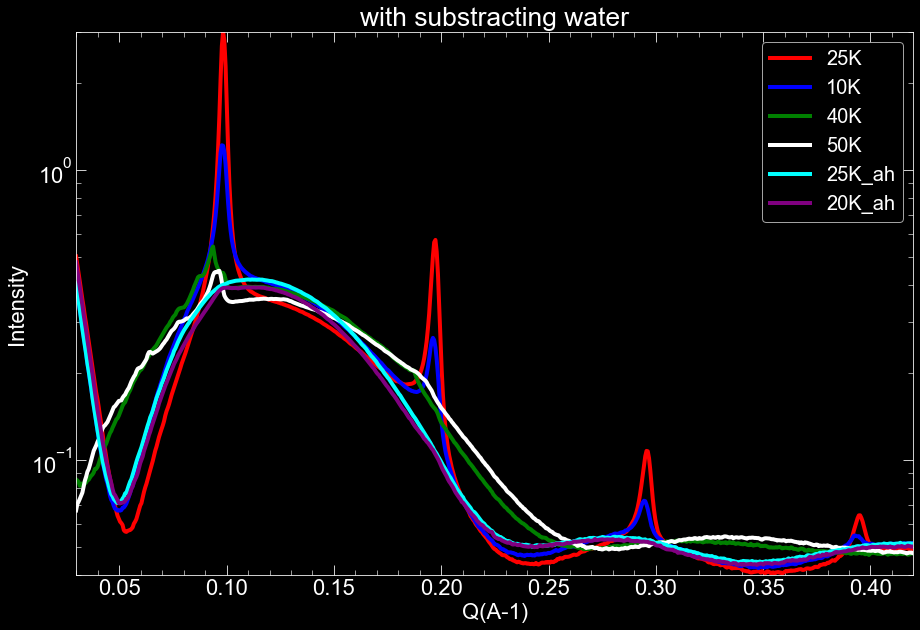

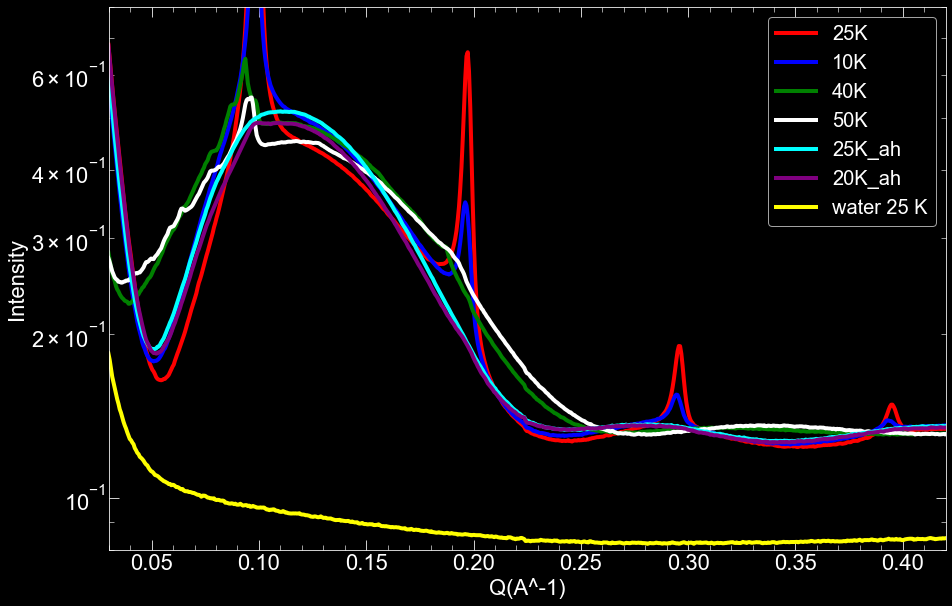

In [8]:
# for DP1 ( 2 mg DPPC)
alltemp_s('SDP1_00149.dat', 'SDP1_00162.dat',
        'SDP1_00175.dat','SDP1_00188.dat',
        'SDP1_00201.dat','SDP1_00214.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SDP1_00149.dat', 'SDP1_00162.dat',
        'SDP1_00175.dat','SDP1_00188.dat',
        'SDP1_00201.dat','SDP1_00214.dat', 'SH2O_00165.dat')

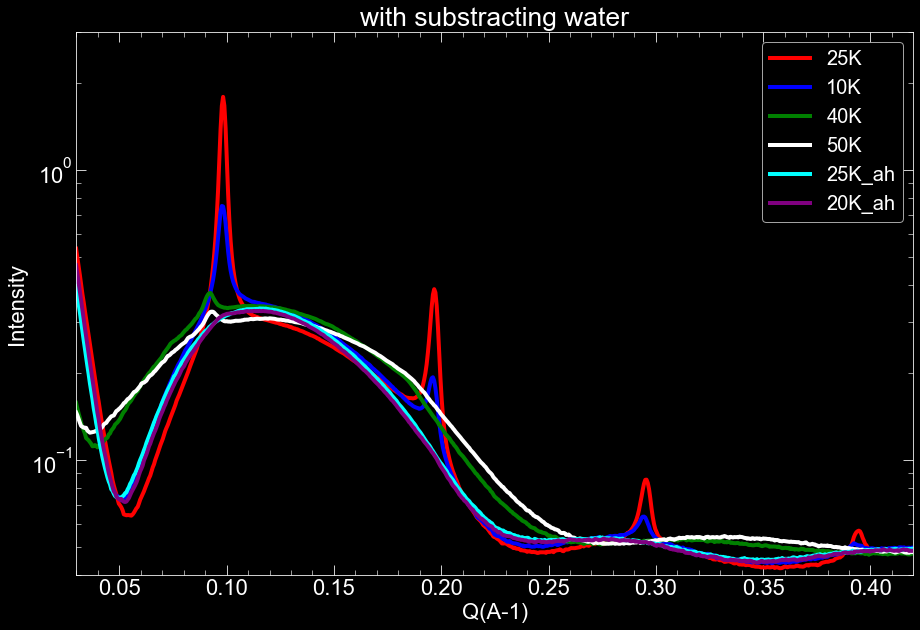

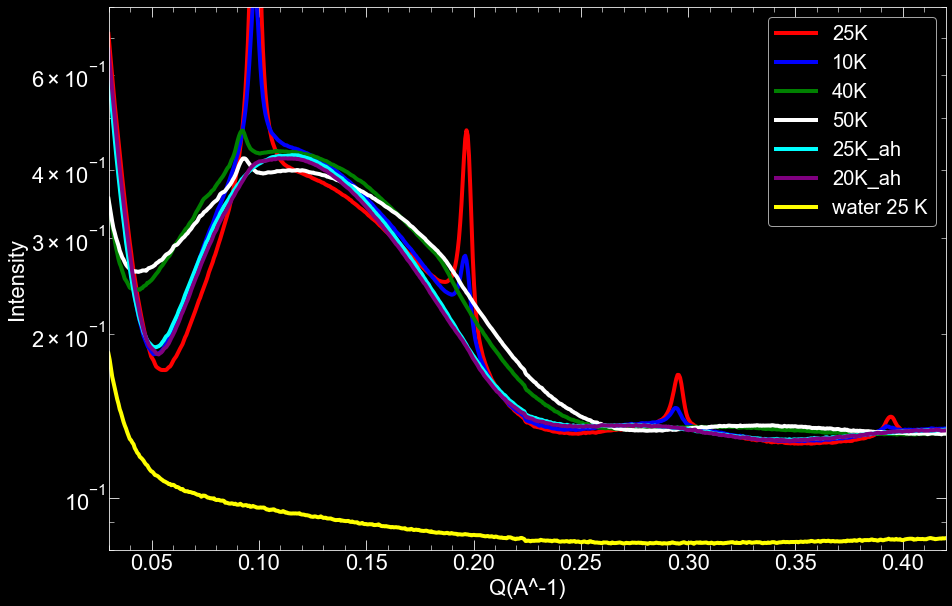

In [9]:
# for DP2 ( 2 mg DPPC + 0.0013 mg AuNPs)
alltemp_s('SDP2_00150.dat', 'SDP2_00163.dat',
        'SDP2_00176.dat','SDP2_00189.dat',
        'SDP2_00202.dat','SDP2_00215.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SDP2_00150.dat', 'SDP2_00163.dat',
        'SDP2_00176.dat','SDP2_00189.dat',
        'SDP2_00202.dat','SDP2_00215.dat', 'SH2O_00165.dat')

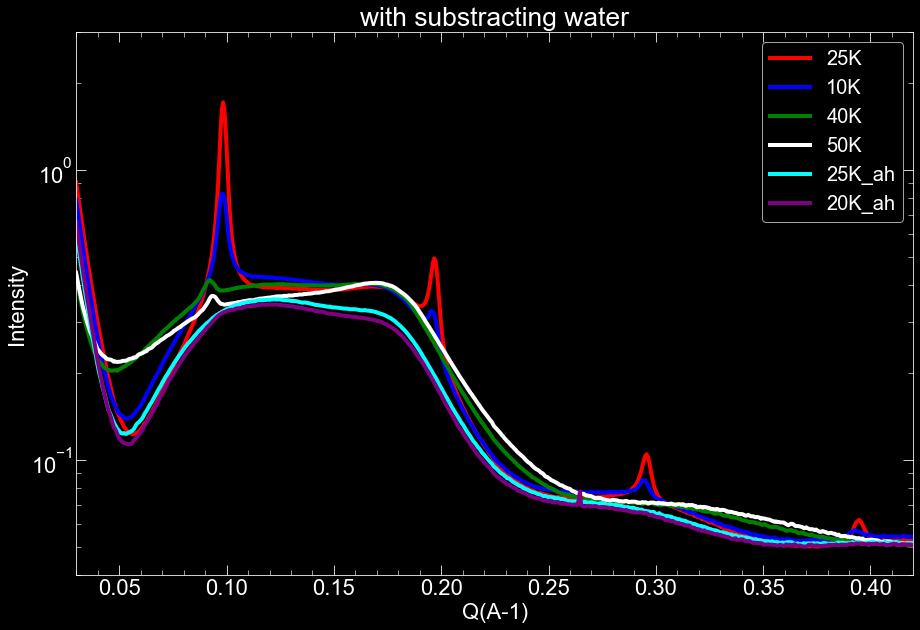

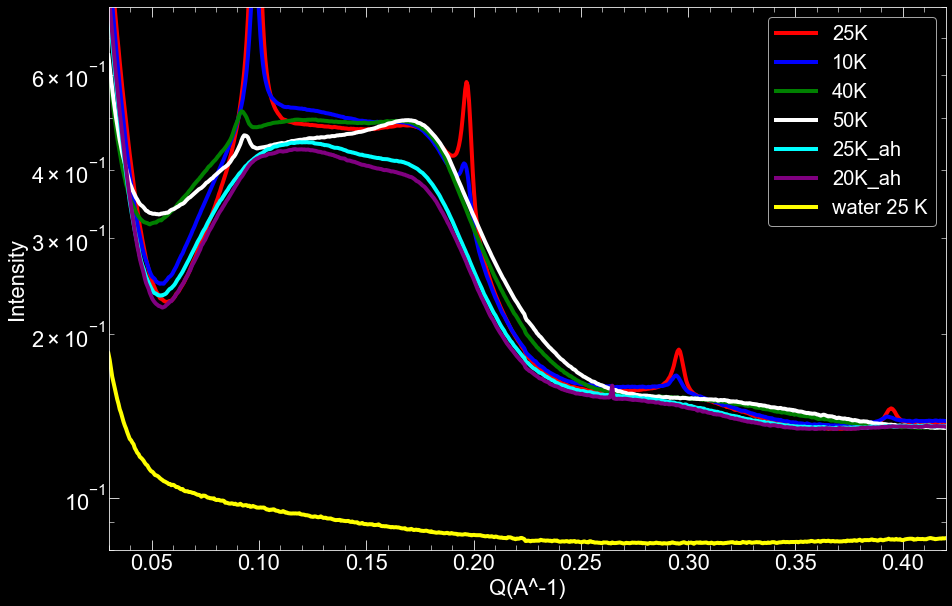

In [10]:
# for DP3 ( 2 mg DPPC + 0.013 mg AuNPs)
alltemp_s('SDP3_00151.dat', 'SDP3_00164.dat',
        'SDP3_00177.dat','SDP3_00190.dat',
        'SDP3_00203.dat','SDP3_00216.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SDP3_00151.dat', 'SDP3_00164.dat',
        'SDP3_00177.dat','SDP3_00190.dat',
        'SDP3_00203.dat','SDP3_00216.dat', 'SH2O_00165.dat')

In [ ]:
#P in temp (10,25,40,50,25,20)
#P1: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC
#P2: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC + 0.0003 mg AuNPs
#P3: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC + 0.003 mg AuNPs

In [ ]:
# for P1 ( 0.7 mg P19015 + 0.37 mg DPPC)
alltemp_s('SP1_00153_.dat', 'SP1_00166_.dat',
        'SP1_00179_.dat','SP1_00192_.dat',
        'SP1_00205_.dat','SP1_00218_.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SP1_00153_.dat', 'SP1_00166_.dat',
        'SP1_00179_.dat','SP1_00192_.dat',
        'SP1_00205_.dat','SP1_00218_.dat',
          'SH2O_00152.dat')

In [ ]:
# for P2 ( 0.7 mg P19015 + 0.37 mg DPPC)
alltemp_s('SP2_00154_.dat', 'SP2_00167_.dat',
        'SP2_00180_.dat','SP2_00193_.dat',
        'SP2_00206_.dat','SP2_00219_.dat',
         'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SP2_00154_.dat', 'SP2_00167_.dat',
        'SP2_00180_.dat','SP2_00193_.dat',
        'SP2_00206_.dat','SP2_00219_.dat',
         'SH2O_00152.dat')

In [ ]:
# for P3 ( 0.7 mg P19015 + 0.37 mg DPPC)
alltemp_s('SP3_00155_.dat', 'SP3_00168_.dat',
        'SP3_00181_.dat','SP3_00194_.dat',
        'SP3_00207_.dat','SP3_00220_.dat',
          'SH2O_00152.dat','SH2O_00165.dat',
         'SH2O_00178.dat','SH2O_00191.dat',
         'SH2O_00204.dat','SH2O_00217.dat')
alltemp('SP3_00155_.dat', 'SP3_00168_.dat',
        'SP3_00181_.dat','SP3_00194_.dat',
        'SP3_00207_.dat','SP3_00220_.dat',
          'SH2O_00152.dat')

In [ ]:
#alehandro sample AF1-Af8
def alltemp_ws( data10, data25, data50, data37, 
            data_w10, data_w25, data_w50, data_w37):
    dat=[data10, data25, data50, data37]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    
    df_w=[]
    dat_w=[data_w10, data_w25, data_w50, data_w37]
    for i in range(len(dat_w)):
        df_w.append(np.genfromtxt(dat_w[i], delimiter='\t'))
    df_w=np.array(df_w)
    
    I=[]
    for i in range(len(dat_w)):
        I.append(df[i,:,1]-df_w[i,:,1])   # substracting each temp empty capillary
    I=np.array(I)
    
    color=['red','blue','green','white']
    lev=['10K','25K','50K','37K']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=3,label=lev[i])
    ax.legend(prop={'size':20})
    ax.set_xlim([0, 0.07])
    #ax.set_ylim([0.001, 0.03])
    ax.set_yscale('log')
    name=data10[1:4]
    return plt.savefig(name)
    plt.show()

In [ ]:

#AF-1: Gemini-NMe2 in water
#AF-2: Gemini-NMe2 in acetate buffer pH 4.5
#AF-3: Gemini-NMe2 in PBS buffer pH 7.4
#AF-4: Gemini-NMe2 in Tris-HCl buffer pH 10.0
#AF-5: Gemini-NMe2 + PE-biotin (0.0625 mM)
#AF-6: Gemini-NMe2 + PE-biotin (0.125 mM)
#AF-7: Gemini-NMe2 + PE-biotin (0.25 mM)
#AF-8: Gemini-NMe2 + PE-biotin + streptavidin



In [ ]:
# for AF1  just after vortex
alltemp_ws('SAF1_00066.dat', 'SAF1_00079.dat',
        'SAF1_00092.dat','SAF1_00105.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF2  just after vortex
alltemp_ws('SAF2_00067.dat', 'SAF2_00080.dat',
        'SAF2_00093.dat','SAF2_00106.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF3  just after vortex
alltemp_ws('SAF3_00068.dat', 'SAF3_00081.dat',
        'SAF3_00094.dat','SAF3_00107.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF4 just after vortex
alltemp_ws('SAF4_00069.dat', 'SAF4_00082.dat',
        'SAF4_00095.dat','SAF4_00108.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF5  just after vortex
alltemp_ws('SAF5_00070.dat', 'SAF5_00083.dat',
        'SAF5_00096.dat','SAF5_00109.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF6  just after vortex
alltemp_ws('SAF6_00071.dat', 'SAF6_00084.dat',
        'SAF6_00097.dat','SAF6_00110.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF7 just after vortex
alltemp_ws('SAF7_00072.dat', 'SAF7_00085.dat',
        'SAF7_00098.dat','SAF7_00111.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
# for AF8 just after vortex
alltemp_ws('SAF8_00073.dat', 'SAF8_00086.dat',
        'SAF8_00099.dat','SAF8_00112.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat')

In [ ]:
#alehandro sample AF1-Af8- phase seprated only diff is save fig name
def alltemp_ws1( data10, data25, data50, data37, 
            data_w10, data_w25, data_w50, data_w37):
    dat=[data10, data25, data50, data37]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    
    df_w=[]
    dat_w=[data_w10, data_w25, data_w50, data_w37]
    for i in range(len(dat_w)):
        df_w.append(np.genfromtxt(dat_w[i], delimiter='\t'))
    df_w=np.array(df_w)
    
    I=[]
    for i in range(len(dat_w)):
        I.append(df[i,:,1]-df_w[i,:,1])   # substracting each temp empty capillary
    I=np.array(I)
    
    color=['red','blue','green','white']
    lev=['10K','25K','50K','37K']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=3,label=lev[i])
    ax.legend(prop={'size':20})
    ax.set_xlim([0.02, 0.4])
    ax.set_ylim([0, 0.03])
    name=data10[:4]
    return plt.savefig(name)
    plt.show()

In [ ]:
# for AF1 phase seprated
alltemp_ws1('SAF1_00354.dat', 'SAF1_00367.dat',
        'SAF1_00380.dat','SAF1_00393.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF2  phase seprated
alltemp_ws1('SAF2_00355.dat', 'SAF2_00368.dat',
        'SAF2_00381.dat','SAF2_00394.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF3  phase seprated
alltemp_ws1('SAF3_00356.dat', 'SAF3_00369.dat',
        'SAF3_00382.dat','SAF3_00395.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF4 phase seprated
alltemp_ws1('SAF4_00357.dat', 'SAF4_00370.dat',
        'SAF4_00383.dat','SAF4_00396.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF5  phase seprated
alltemp_ws1('SAF5_00358.dat', 'SAF5_00371.dat',
        'SAF5_00384.dat','SAF5_00397.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF6 phase seprated
alltemp_ws1('SAF6_00359.dat', 'SAF6_00372.dat',
        'SAF6_00385.dat','SAF6_00398.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF7 phase seprated
alltemp_ws1('SAF7_00360.dat', 'SAF7_00373.dat',
        'SAF7_00386.dat','SAF7_00399.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
# for AF8 phase seprated
alltemp_ws1('SAF8_00361.dat', 'SAF8_00374.dat',
        'SAF8_00387.dat','SAF8_00400.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#comprasion betwn no phase sep and phase sep
def alltemp_c( data10, data25, data50, data37, 
            data_w10, data_w25, data_w50, data_w37,
            sdata10, sdata25, sdata50, sdata37, 
            sdata_w10, sdata_w25, sdata_w50, sdata_w37):
    dat=[data10, data25, data50, data37]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    
    df_w=[]
    dat_w=[data_w10, data_w25, data_w50, data_w37]
    for i in range(len(dat_w)):
        df_w.append(np.genfromtxt(dat_w[i], delimiter='\t'))
    df_w=np.array(df_w)
    
    I=[]
    for i in range(len(dat_w)):
        I.append(df[i,:,1]-df_w[i,:,1])   # substracting each temp empty capillary
    I=np.array(I)
    
    #after phase seprated
    sdat=[sdata10, sdata25, sdata50, sdata37]
    sdf=[]
    for i in range(len(sdat)):
        sdf.append(np.genfromtxt(sdat[i], delimiter='\t'))
    sdf=np.array(sdf)
    sq = sdf[:,:,0] 
    sdf_w=[]
    sdat_w=[sdata_w10, sdata_w25, sdata_w50, sdata_w37]
    for i in range(len(sdat_w)):
        sdf_w.append(np.genfromtxt(sdat_w[i], delimiter='\t'))
    sdf_w=np.array(sdf_w)
    
    sI=[]
    for i in range(len(dat_w)):
        sI.append(sdf[i,:,1]-sdf_w[i,:,1])   # substracting each temp empty capillary
    sI=np.array(sI)
    
    color=['red','blue','green','white']
    lev=['10K','25K','50K','37K']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(yscale='log', ylabel='Intensity', xlabel='Q(A-1)')
    
    
    #change 0, 1, 2, 3 accordingly and change label and figname also
    ax.plot(q[3,:],I[3,:], color='white',linewidth=3,label='37K') #0=10K, 1=25K, 2=50K, 3=37K)
    ax.plot(sq[3,:],sI[3,:], color='red',linestyle='--',linewidth=3,label='phase_sep_37K')  # change label also
    ax.legend(prop={'size':20})
    ax.set_xlim([0.02, 0.4])
    #ax.set_ylim([0, 0.03])
    name=data10[1:4]
    return plt.savefig('c'+name+'_37K') #change fig name also
    plt.show()
    


In [ ]:
#SF1
alltemp_c('SAF1_00066.dat', 'SAF1_00079.dat',
        'SAF1_00092.dat','SAF1_00105.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
          'SAF1_00354.dat', 'SAF1_00367.dat',
        'SAF1_00380.dat','SAF1_00393.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF2
alltemp_c('SAF2_00067.dat', 'SAF2_00080.dat',
        'SAF2_00093.dat','SAF2_00106.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF2_00355.dat', 'SAF2_00368.dat',
        'SAF2_00381.dat','SAF2_00394.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF3
alltemp_c('SAF3_00068.dat', 'SAF3_00081.dat',
        'SAF3_00094.dat','SAF3_00107.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF3_00356.dat', 'SAF3_00369.dat',
        'SAF3_00382.dat','SAF3_00395.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF4
alltemp_c('SAF4_00069.dat', 'SAF4_00082.dat',
        'SAF4_00095.dat','SAF4_00108.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
          'SAF4_00357.dat', 'SAF4_00370.dat',
        'SAF4_00383.dat','SAF4_00396.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF5
alltemp_c('SAF5_00070.dat', 'SAF5_00083.dat',
        'SAF5_00096.dat','SAF5_00109.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF5_00358.dat', 'SAF5_00371.dat',
        'SAF5_00384.dat','SAF5_00397.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF6
alltemp_c('SAF6_00071.dat', 'SAF6_00084.dat',
        'SAF6_00097.dat','SAF6_00110.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF6_00359.dat', 'SAF6_00372.dat',
        'SAF6_00385.dat','SAF6_00398.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF7
alltemp_c('SAF7_00072.dat', 'SAF7_00085.dat',
        'SAF7_00098.dat','SAF7_00111.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF7_00360.dat', 'SAF7_00373.dat',
        'SAF7_00386.dat','SAF7_00399.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')

In [ ]:
#SF8
alltemp_c('SAF8_00073.dat', 'SAF8_00086.dat',
        'SAF8_00099.dat','SAF8_00112.dat',
         'Swater_00075.dat','Swater_00088.dat',
         'Swater_00101.dat','Swater_00114.dat',
         'SAF8_00361.dat', 'SAF8_00374.dat',
        'SAF8_00387.dat','SAF8_00400.dat',
         'Swater_00363.dat','Swater_00376.dat',
         'Swater_00389.dat','Swater_00402.dat')